In [1]:
from google.colab import files
uploaded= files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [2]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f'GPU is available. Using {torch.cuda.get_device_name(0)}')
else:
    device = torch.device('cpu')
    print('GPU not available, using CPU.')


GPU is available. Using Tesla T4


In [3]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

# First few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info() # Categorical columns -> 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Check for missing values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
# Fill missing BMI values with mean before normalization
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

#check again
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [8]:
# Get unique values from categorical columns

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
  print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


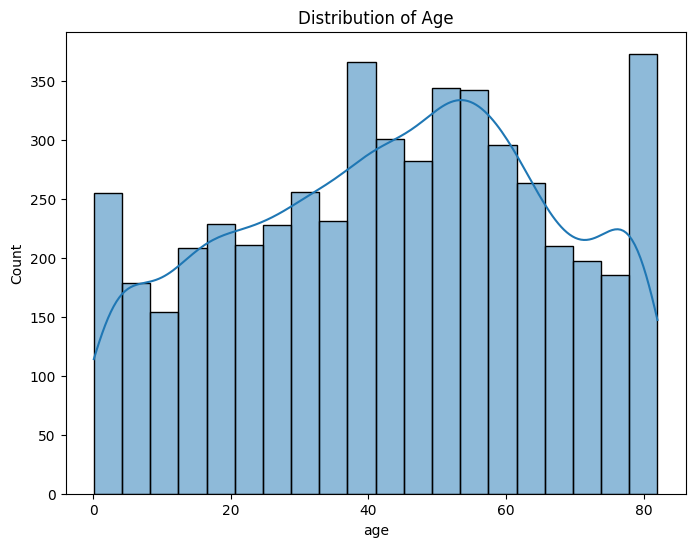

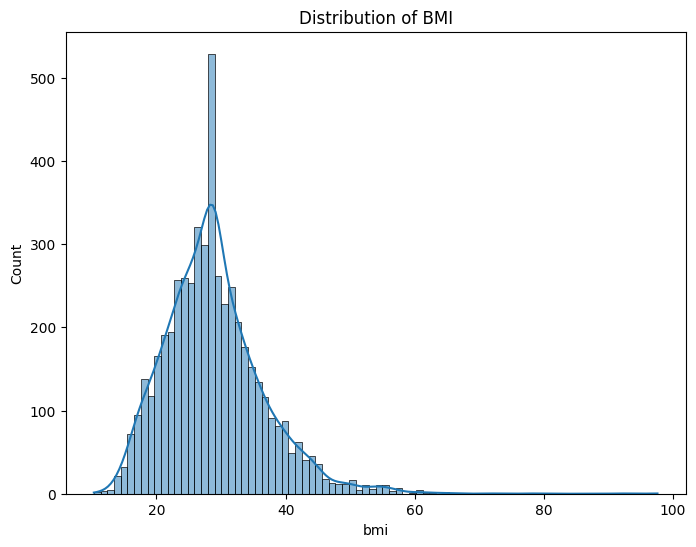

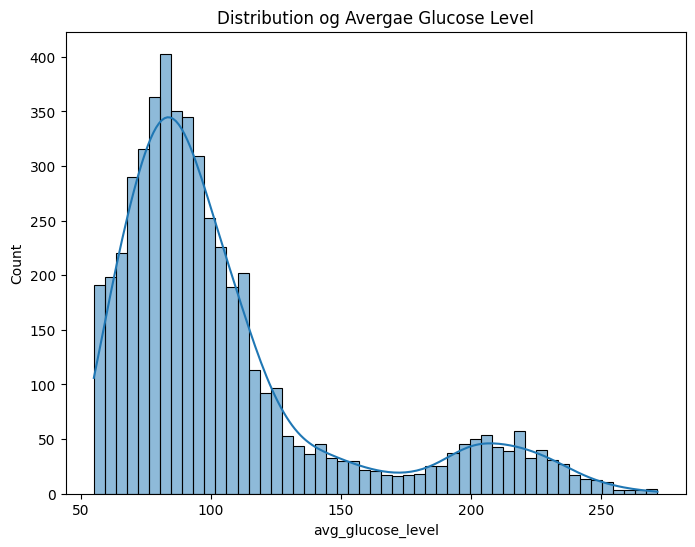

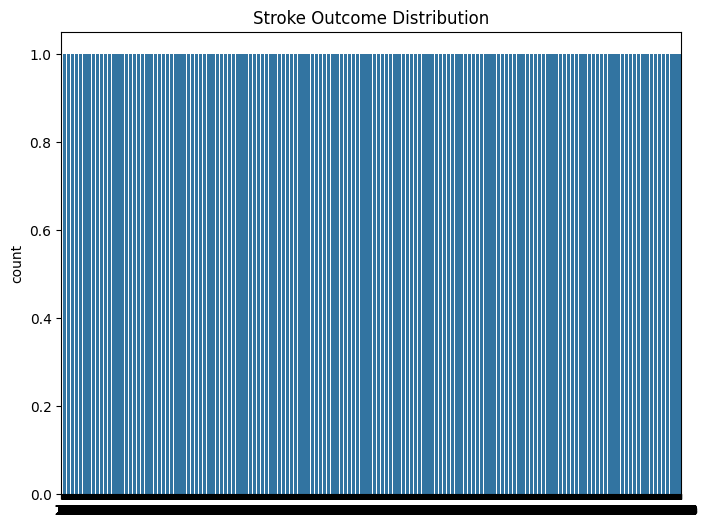

In [9]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['age'],kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Distribution og Avergae Glucose Level')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(df['stroke'])
plt.title('Stroke Outcome Distribution')
plt.show()

In [10]:
# label encoding for categorical columns and normalizing 'age', 'avg_glucose_level', 'bmi'

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

for col in categorical_columns:
  df[col] = le.fit_transform(df[col])

#normalizing
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


# looking at first few rows after encoding and normalizing
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,1,1
1,51676,0,0.786070,0,0,1,3,0,2.121559,4.615554e-16,2,1
2,31112,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,2,1
3,60182,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,3,1
4,1665,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,2,1


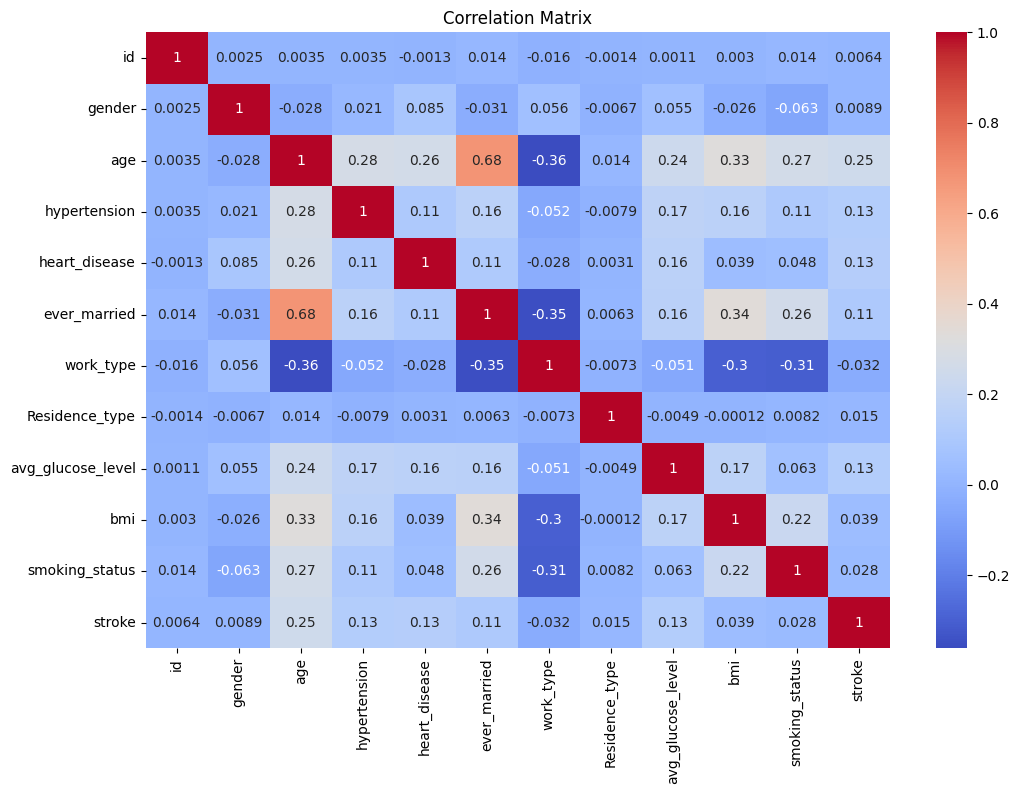

In [11]:
# Correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# outlier detection
def dectect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  num_outliers = outliers.shape[0]

  print(f"{column}: {num_outliers} outliers detected")

  return outliers

numeric_columns = ['age', 'bmi', 'avg_glucose_level']

for col in numeric_columns:
  outliers = dectect_outliers(df, col)

age: 0 outliers detected
bmi: 126 outliers detected
avg_glucose_level: 627 outliers detected


In [13]:
print(f"Data shape before outlier removal: {df.shape}")

# Removing outliers
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  print(f"\nRemoved outliers from {column}.")

  return df_cleaned

columns_with_outliers = ['bmi','avg_glucose_level']

df_cleaned = df.copy()

for col in columns_with_outliers:
  df_cleaned = remove_outliers(df_cleaned, col)

print(f"\nData shape after outlier removal: {df_cleaned.shape}")


Data shape before outlier removal: (5110, 12)

Removed outliers from bmi.

Removed outliers from avg_glucose_level.

Data shape after outlier removal: (4390, 12)


In [14]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(columns=['id', 'stroke'])
y = df_cleaned['stroke']


#  SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X, y)

# Split the resampled data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (6760, 10)
Test set size: (1690, 10)


In [15]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Converting the data to pytorch sensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

# Creating TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [16]:
# Building a neural network with 3 fully connected layers

import torch.nn as nn

class StrokePredictionModel(nn.Module):
  def __init__(self, input_size):
    super(StrokePredictionModel, self).__init__()
    self.fc1 = nn.Linear(input_size, 64)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(64, 32)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(32, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    return self.sigmoid(x)

In [18]:
# Initiliazing and training the model
input_size = X_train.shape[1]
model = StrokePredictionModel(input_size).to(device)

# Define class weights for the loss function
class_counts = y_train.value_counts().values
class_weights = torch.tensor([class_counts[0], class_counts[1]], dtype=torch.float32).to(device)  # Class weights for BCELoss

criterion = nn.BCELoss()  # Use BCELoss without weight broadcasting issues
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Reshape labels
y_train_tensor = y_train_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Ensure proper loss calculation

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


Epoch [1/100], Loss: 0.5216
Epoch [2/100], Loss: 0.4332
Epoch [3/100], Loss: 0.4135
Epoch [4/100], Loss: 0.4002
Epoch [5/100], Loss: 0.3841
Epoch [6/100], Loss: 0.3732
Epoch [7/100], Loss: 0.3644
Epoch [8/100], Loss: 0.3565
Epoch [9/100], Loss: 0.3485
Epoch [10/100], Loss: 0.3397
Epoch [11/100], Loss: 0.3357
Epoch [12/100], Loss: 0.3325
Epoch [13/100], Loss: 0.3264
Epoch [14/100], Loss: 0.3189
Epoch [15/100], Loss: 0.3153
Epoch [16/100], Loss: 0.3119
Epoch [17/100], Loss: 0.3092
Epoch [18/100], Loss: 0.3003
Epoch [19/100], Loss: 0.3001
Epoch [20/100], Loss: 0.2959
Epoch [21/100], Loss: 0.2924
Epoch [22/100], Loss: 0.2885
Epoch [23/100], Loss: 0.2882
Epoch [24/100], Loss: 0.2840
Epoch [25/100], Loss: 0.2805
Epoch [26/100], Loss: 0.2765
Epoch [27/100], Loss: 0.2734
Epoch [28/100], Loss: 0.2718
Epoch [29/100], Loss: 0.2706
Epoch [30/100], Loss: 0.2685
Epoch [31/100], Loss: 0.2654
Epoch [32/100], Loss: 0.2635
Epoch [33/100], Loss: 0.2596
Epoch [34/100], Loss: 0.2574
Epoch [35/100], Loss: 0

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Evaluating Models
model.eval()
test_outputs = []
test_labels = []

with torch.no_grad():
  for inputs, labels in test_loader:
    outputs = model(inputs)
    test_outputs.append(outputs.cpu())
    test_labels.append(labels.cpu())

test_outputs = torch.cat(test_outputs).numpy()
test_labels = torch.cat(test_labels).numpy()


test_predictions = (test_outputs > 0.5).astype(int)
accuracy = accuracy_score(test_labels, test_predictions)
roc_auc = roc_auc_score(test_labels, test_outputs)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9213
ROC AUC: 0.9638


In [20]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, test_predictions)
print(conf_matrix)


[[759  83]
 [ 50 798]]
